### Increased levels CO2 and Nitrogen in the atmosphere, and the impact on biomass
We know that the atmospheric levels of CO2 and Nitrogen is increasing with the climate change. 
- How does this affect the biomass in plants?

We have a hypothesis that uncomsumed soil levels of nitrate are less where there is higher biodiversity

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
ls datasets/

MS00101_v9.csv
bioCON_plant_diversity.txt
e081_Atmospheric deposition and precipitation.txt
national_parks_biodiversity_parks.csv
national_parks_biodiversity_species.csv
plant_pollinator_diversity_set1.csv
plant_pollinator_diversity_set2.csv


In [4]:
bicon = pd.read_csv('datasets/bioCON_plant_diversity.txt', delimiter='\t')

In [5]:
bicon.columns

Index(['Year', 'Plot', 'Ring', 'CO2 Treatment', 'Nitrogen Treatment',
       'CountOfSpecies', 'CountOfGroup', 'Experiment', 'monospecies',
       'Monogroup', 'Water Treatment', 'Temp Treatment', 'Depth', 'Carbon(%)',
       'Nitrogen(%)', 'C/N Ratio'],
      dtype='object')

In [114]:
bicon['Depth'].value_counts()

40-60    1409
0-10     1408
10-20    1408
20-40    1408
Name: Depth, dtype: int64

In [133]:
bicon.sample(5)

,Year,Plot,Ring,CO2 Treatment,Nitrogen Treatment,CountOfSpecies,CountOfGroup,Experiment,monospecies,Monogroup,Water Treatment,Temp Treatment,Depth,Carbon(%),Nitrogen(%),C/N Ratio
4218,2012,313,6,Camb,Namb,4,1,S,,Forb,,,20-40,0.4680,0.0430,10.88372093
3508,2012,136,3,Cenrich,Nenrich,4,1,S,,Forb,,,10-20,0.5780,0.0510,11.33333333
1008,2002,253,5,Cenrich,Nenrich,16,4,M,,,,,10-20,1.0080,0.1010,9.98019802
1163,2002,291,5,Cenrich,Namb,4,4,S,,,,,0-10,0.3671,0.0442,8.305429864
4811,2016,114,2,Camb,Nenrich,4,3,M,,,,,40-60,0.3000,0.0200,15


In [32]:
bicon['Carbon(%)'] = pd.to_numeric(bicon['Carbon(%)'], errors='coerce')
bicon['Nitrogen(%)'] = pd.to_numeric(bicon['Nitrogen(%)'], errors='coerce')

### Nitrogen percentage based on count of species and depth
- We can see that the deeper values have lower Nitrogen values
- We can also see that the slope is similar in the different depths, but the scaling is different

<AxesSubplot:xlabel='CountOfSpecies'>

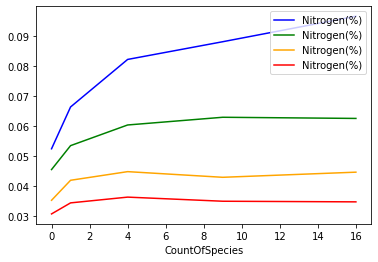

In [144]:
df = bicon.loc[:, ['CountOfSpecies', 'Depth', 'Nitrogen(%)', 'Nitrogen Treatment']].copy()

df['Nitrogen(%)'] = pd.to_numeric(df['Nitrogen(%)'], errors='coerce')
df['CountOfSpecies'] = pd.to_numeric(df['CountOfSpecies'], errors='coerce')

#fig, axes = plt.subplots(nrows=2, ncols=2)

ax = df[(df['Depth'] == '0-10') & (df['Nitrogen Treatment'] == 'Nenrich')].groupby('CountOfSpecies').mean().plot(color='blue')
df[(df['Depth'] == '10-20') & (df['Nitrogen Treatment'] == 'Nenrich')].groupby('CountOfSpecies').mean().plot(ax=ax, color='green')
df[(df['Depth'] == '20-40') & (df['Nitrogen Treatment'] == 'Nenrich')].groupby('CountOfSpecies').mean().plot(ax=ax, color='orange')
df[(df['Depth'] == '40-60') & (df['Nitrogen Treatment'] == 'Nenrich')].groupby('CountOfSpecies').mean().plot(ax=ax, color='red')